# OCR with Python - pre-processing techiniques

# Importing the libraries

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt


# Grayscale

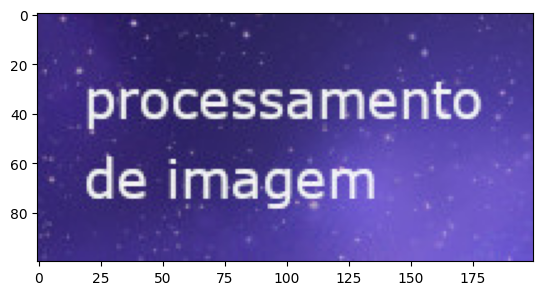

In [3]:
img = cv2.imread('Images/img-process.jpg')
# plt.figure(figsize=(10, 8)) 
plt.imshow(img)
plt.show()

In [4]:
img.shape

(100, 200, 3)

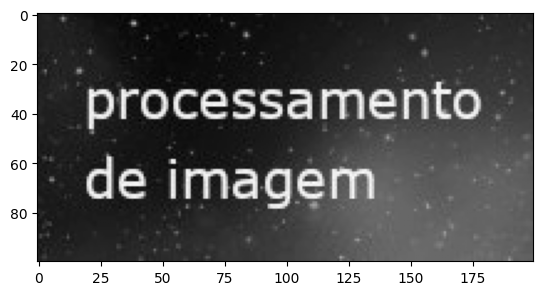

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [9]:
gray.shape

(100, 200)

# Thresholding

## Simple thresholding

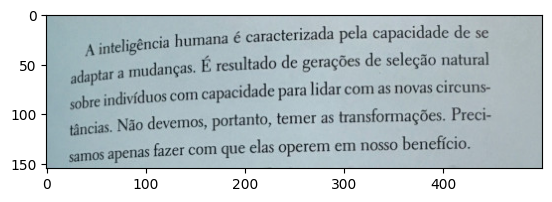

In [11]:
img = cv2.imread('Images/page-book.jpg')
plt.imshow(img)

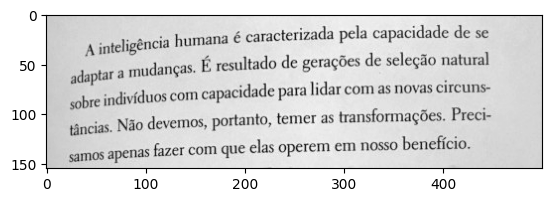

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

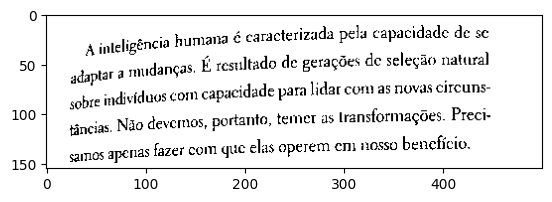

In [14]:
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# plt.imshow(thresh)

plt.imshow(thresh, cmap='gray')
plt.show()

In [15]:
value

127.0

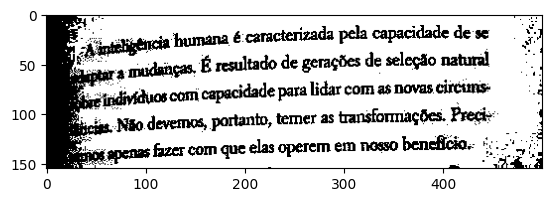

In [17]:
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

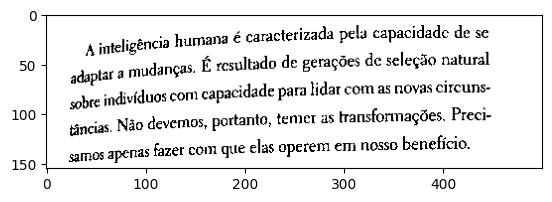

In [18]:
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

## Otsu method

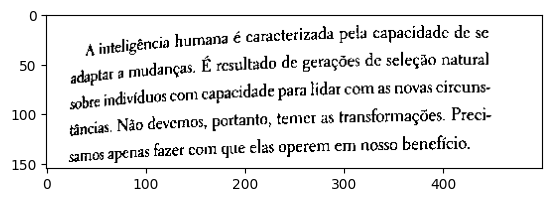

138.0


In [19]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')
plt.show()
print(value)

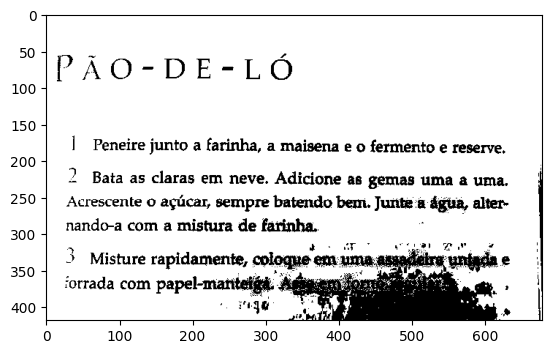

138.0


In [24]:
img = cv2.imread('Images/recipe01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()
print(value)

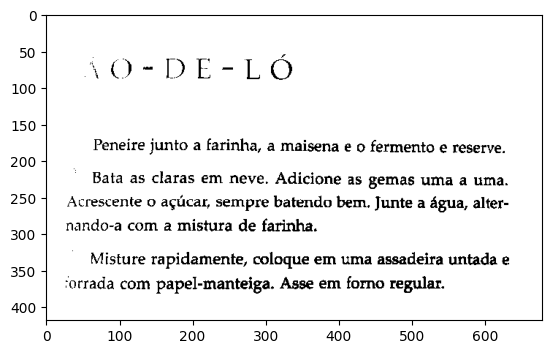

119.0


In [26]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.show()
print(value)

## Adaptive Thresholding

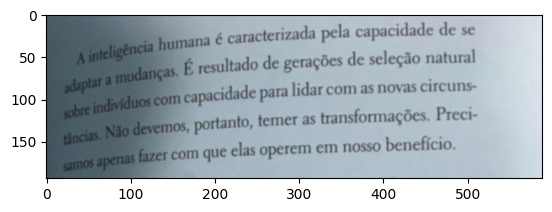

In [29]:
img = cv2.imread('Images/book02.jpg')
plt.imshow(img)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# cv2_imshow(otsu)
# print(value)

147.0


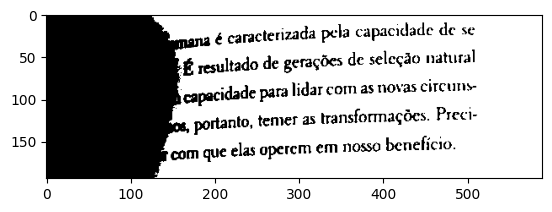

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu,cmap="gray")
print(value)

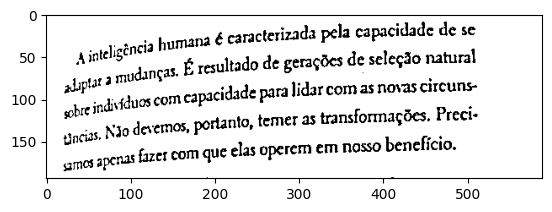

In [34]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive_average, cmap="gray")

## Gaussian Adaptive Thresholding

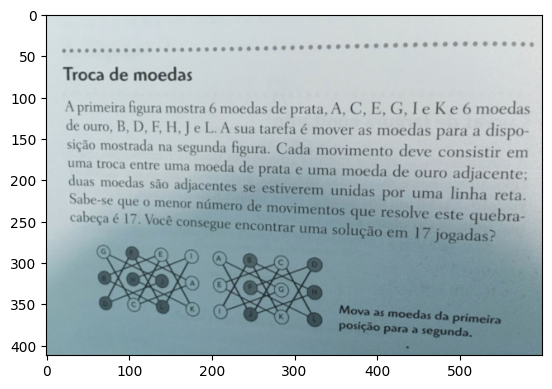

In [35]:
img = cv2.imread('Images/book_adaptative.jpg')
plt.imshow(img)

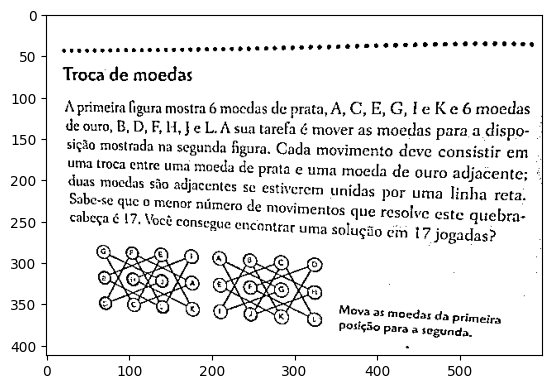

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive_gaussian, cmap="gray")

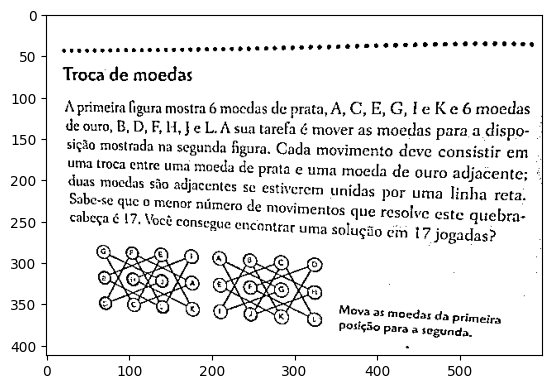

In [37]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive_gaussian, cmap="gray")

# Color inversion

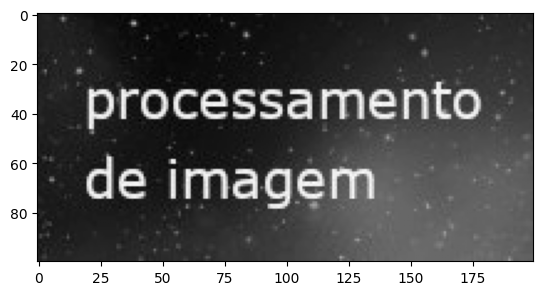

In [39]:
img = cv2.imread('Images/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")

In [40]:
img.shape, gray.shape

((100, 200, 3), (100, 200))

In [41]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [42]:
invert = 255 - gray

In [43]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

In [44]:
255 - 68

187

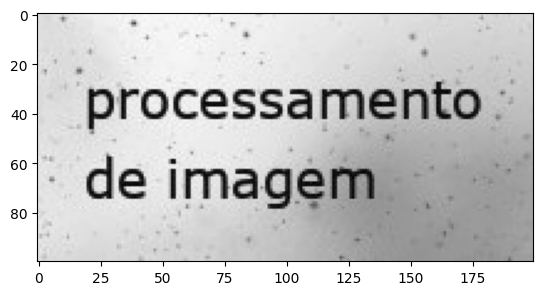

In [46]:
plt.imshow(invert, cmap="gray")

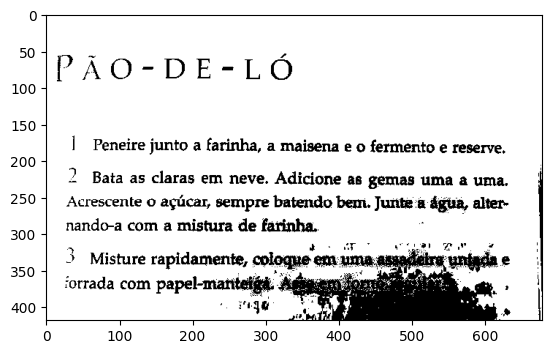

In [48]:
plt.imshow(thresh, cmap="gray")

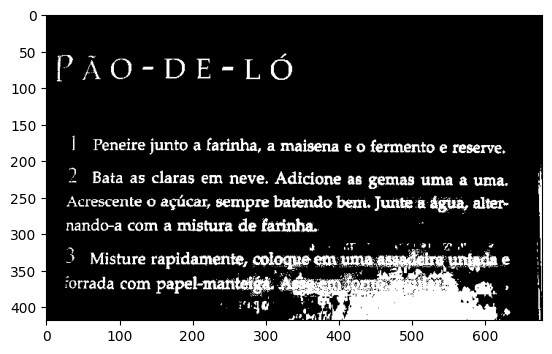

In [49]:
invert = 255 - thresh
plt.imshow(invert,cmap="gray")

# Resizing

- INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
- INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
- INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results
- INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
- INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.

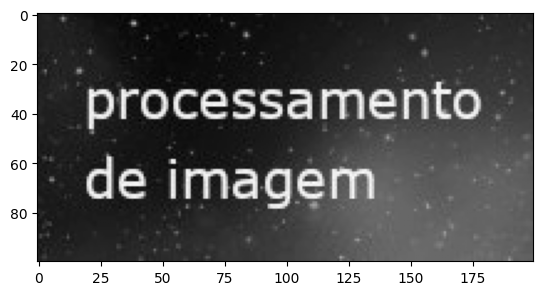

In [51]:
plt.imshow(gray, cmap="gray")

In [52]:
gray.shape

(100, 200)

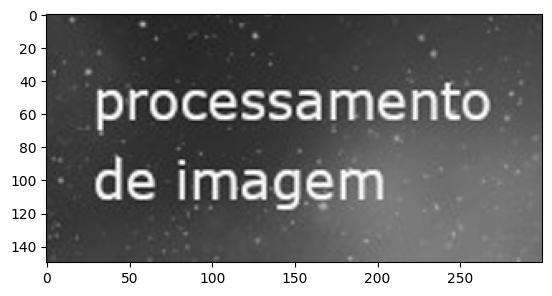

In [53]:
increase = cv2.resize(gray, None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
plt.imshow(increase, cmap="gray")

In [54]:
increase.shape

(150, 300)

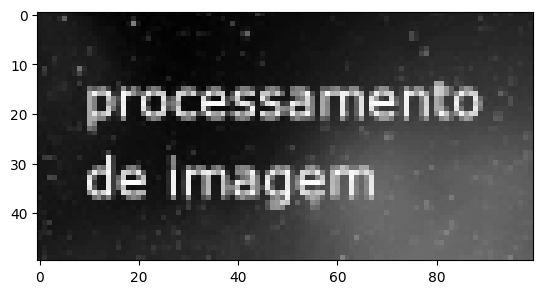

In [56]:
decrease = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
plt.imshow(decrease, cmap="gray")

In [57]:
decrease.shape

(50, 100)

# Morphological operations

## Erosion

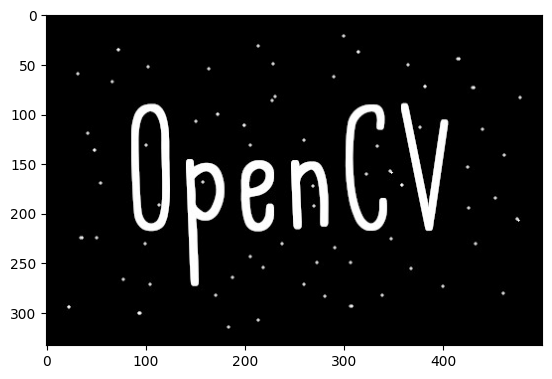

In [3]:
img = cv2.imread('Images/text-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

In [4]:
np.ones((3,3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

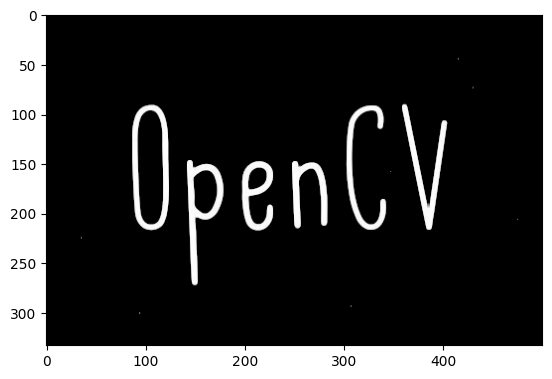

In [5]:
erosion = cv2.erode(gray, np.ones((3,3), np.uint8))
plt.imshow(erosion, cmap="gray")

## Dilation

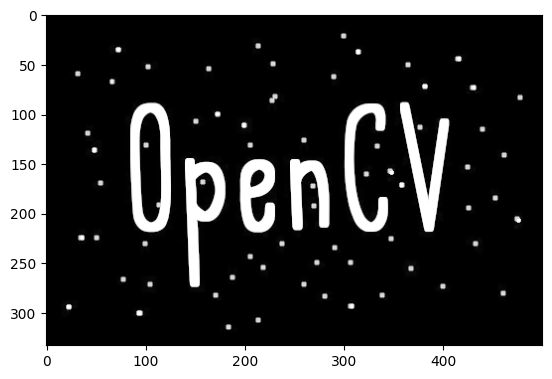

In [6]:
dilation = cv2.dilate(gray, np.ones((3,3), np.uint8))
plt.imshow(dilation, cmap="gray")

## Opening

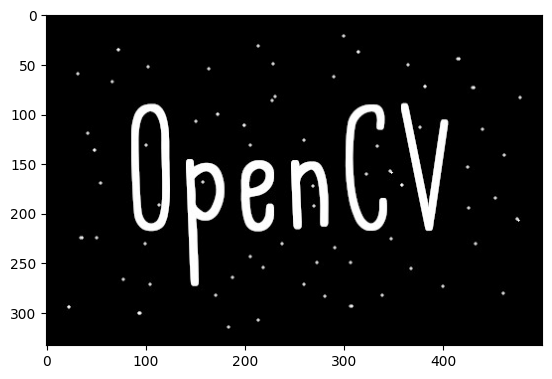

In [8]:
erosion = cv2.erode(gray, np.ones((5,5), np.uint8))
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))
plt.imshow(gray, cmap="gray")



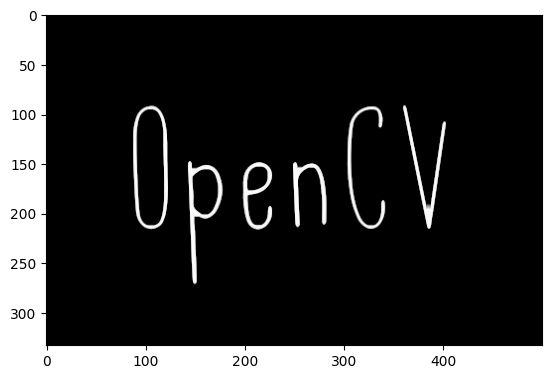

In [9]:
plt.imshow(erosion, cmap="gray")


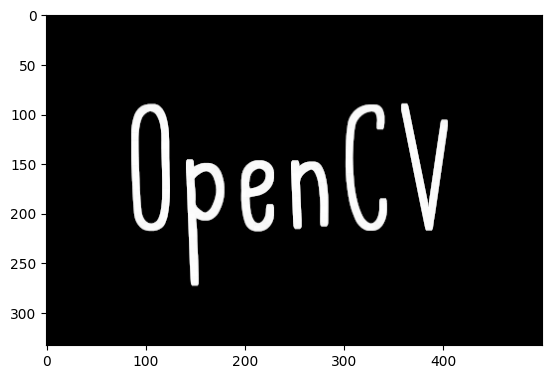

In [10]:
plt.imshow(opening, cmap="gray")

## Closing

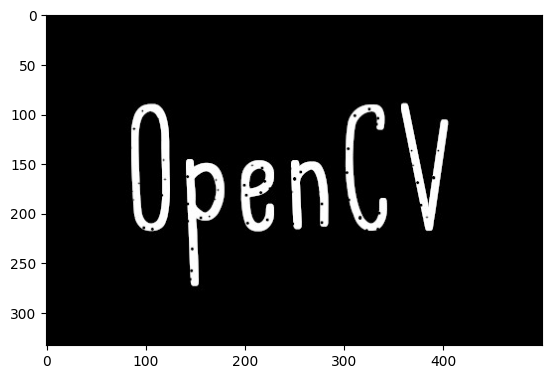

In [12]:
img = cv2.imread('Images/text-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")


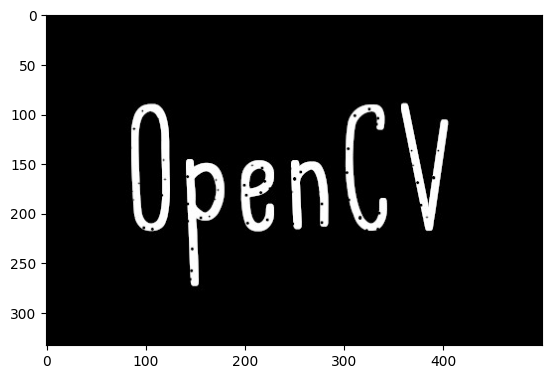

In [14]:
dilation = cv2.dilate(gray, np.ones((5,5), np.uint8))
closing = cv2.erode(dilation, np.ones((5,5), np.uint8))
plt.imshow(gray, cmap="gray")



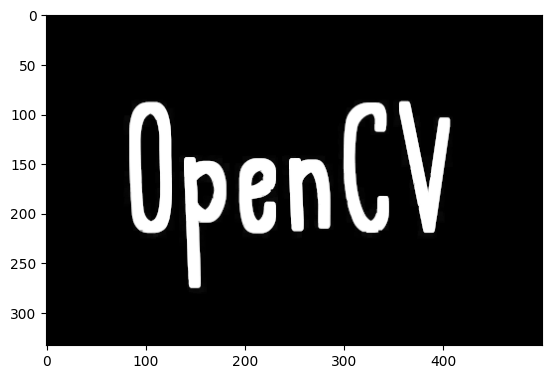

In [15]:

plt.imshow(dilation, cmap="gray")


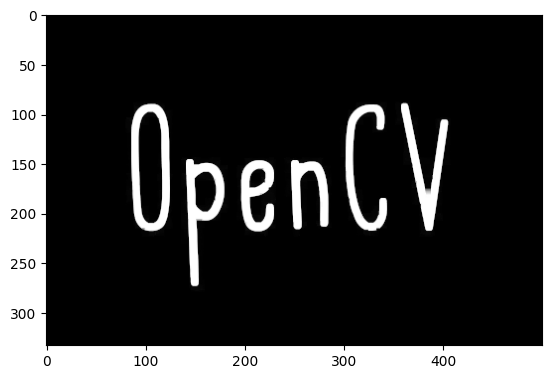

In [16]:

plt.imshow(closing, cmap="gray")

# Noise removal

## Average blur

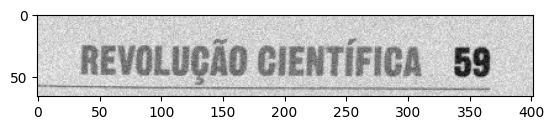

In [18]:
img = cv2.imread('Images/test_noise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

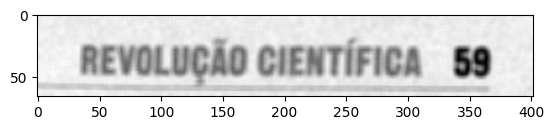

In [20]:
average_blur = cv2.blur(gray, (5,5))

plt.imshow(average_blur, cmap="gray")

## Gaussian blur


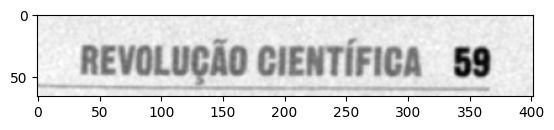

In [21]:
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(gaussian_blur, cmap="gray")

## Median blur

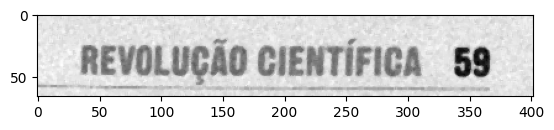

In [22]:
median_blur = cv2.medianBlur(gray, 3)

plt.imshow(median_blur, cmap="gray")

## Bilateral filter

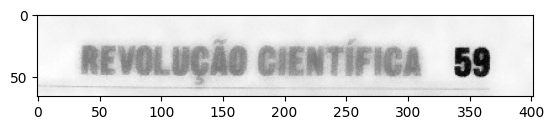

In [23]:
bilateral_filter = cv2.bilateralFilter(gray, 15, 55, 45)

plt.imshow(bilateral_filter, cmap="gray")

# Text detection

In [28]:
import pytesseract

In [29]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(average_blur, lang = 'por', config=config_tesseract)
print(text)

In [30]:
text = pytesseract.image_to_string(median_blur, lang = 'por', config=config_tesseract)
print(text)

— REVOLUÇÃO CIENTÍFICA 59

